# Setup

In [0]:
import numpy as np
from scipy.signal import place_poles
from scipy.integrate import odeint
from scipy.linalg import inv, solve_continuous_are, eig
import matplotlib.pyplot as plt

A = np.asarray([
     [0,     0,      1,  0],
     [0,     0,      0,  1],
     [0,     5.923,  0,  0],
     [0,     13.68,  0,  0],
])

B = np.asarray([
     [0],
     [0],
     [0.189],
     [0.019],
])

# eig(A)

# Task F

Design state feedback controller for linearized system using pole placement method.

## Pole Placement

Just move poles to negative half-plane

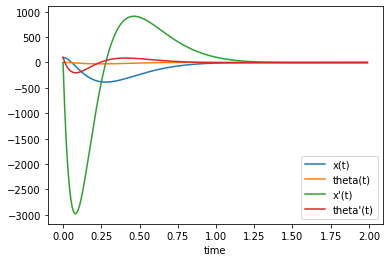

In [43]:

# convergence speed depends on poles position: less - better.
desired_poles =np.array([-6, -7, -8, -5])  
full_state_feedback = place_poles(A, B, desired_poles)

k = full_state_feedback.gain_matrix
new_A = A - B.dot(k)

def differential(x, t):
  return new_A.dot(x)

pi = 3.14

x_0 = 100
ang_0 = 0
diff_x_0 = 0
diff_ang_0 = 100

time_start = 0
time_finish = 2
time_step = 0.01

time = np.arange(time_start, time_finish, time_step)
init = [x_0, ang_0, diff_x_0, diff_ang_0]

solution = odeint(differential, init, time)
plt.plot(time, solution)
plt.xlabel('time')

plt.legend(["x(t)", "theta(t)", "x'(t)", "theta'(t)"])
plt.show()


## Root-locus

**Note:** installation of _control_ package takes time.

In [0]:
!pip install slycot control 

(array([[ -8.        +0.00000000e+00j,  -7.        +0.00000000e+00j,
          -6.        +0.00000000e+00j,  -5.        +0.00000000e+00j],
        [ -7.58241121+0.00000000e+00j,  -7.58241036+0.00000000e+00j,
          -5.78418692+0.00000000e+00j,  -5.05099151+0.00000000e+00j],
        [ -7.68108654-5.95240445e-01j,  -7.68108654+5.95240445e-01j,
          -5.31891346-3.84708244e-07j,  -5.31891346+3.84708244e-07j],
        [ -7.84117447-1.03379617e+00j,  -7.84117447+1.03379617e+00j,
          -5.15882553-4.54579688e-01j,  -5.15882553+4.54579688e-01j],
        [ -7.94650878-1.28169511e+00j,  -7.94650878+1.28169511e+00j,
          -5.05349122-5.77417756e-01j,  -5.05349122+5.77417756e-01j],
        [ -8.02785818-1.46561533e+00j,  -8.02785818+1.46561533e+00j,
          -4.97214182-6.52342090e-01j,  -4.97214182+6.52342090e-01j],
        [ -8.09517652-1.61552218e+00j,  -8.09517652+1.61552218e+00j,
          -4.90482348-7.05436462e-01j,  -4.90482348+7.05436462e-01j],
        [ -8.29213094-2.052

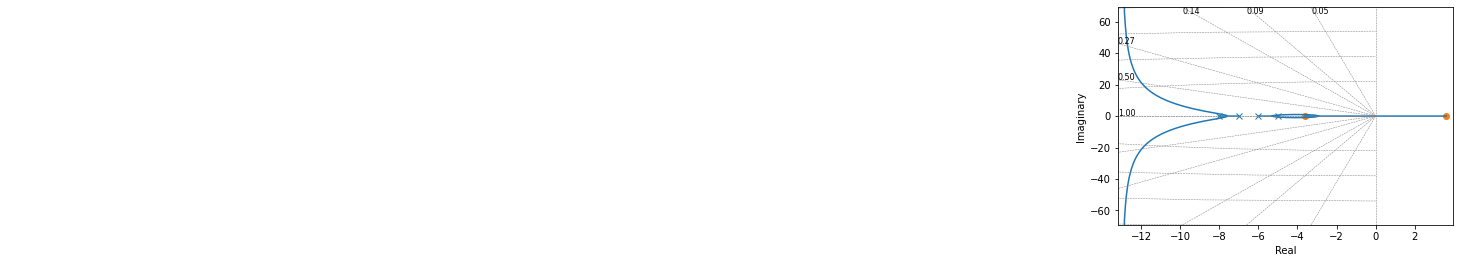

In [36]:
import control

C = np.array([1,0,0,0])
# C = np.array([0,1,0,0])

D = 0

sys = control.ss(new_A,B,C,D)
control.root_locus(sys)

# Task G

Design LQR for linearized system. Assess the performance of the controller for variety
of initial conditions

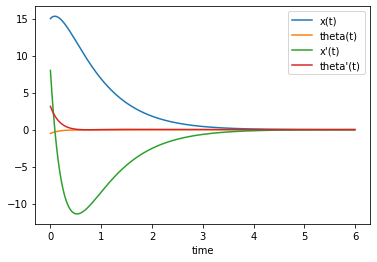

In [19]:

def lqr(A, B, Q, R):
  """
  dx/dt = Ax+ Bu

  J = integral of x.T * Q * x + u.T *R * u
  """
  # solve Algebraic Riccati equation
  S = solve_continuous_are(A, B, Q, R)
  
  # Compute gain 
  K = inv(R) * B.T.dot(S)

  return np.asarray(K)



# Let Q and R be diagonal since 
# nothing is said about resource management and convergence speed

Q = np.eye(4) * 100

R = np.eye(1)

k = lqr(A, B, Q, R)

def differential(x,t):
  u = -k.dot(x)
  return A.dot(x) + B.dot(u)

pi = 3.14

x_0 = 15
ang_0 = -pi/6
diff_x_0 = 8
diff_ang_0 = pi

time_start = 0
time_finish = 6
time_step = 0.01

time = np.arange(time_start, time_finish, time_step)
init = [x_0, ang_0, diff_x_0, diff_ang_0]

solution = odeint(differential, init, time)
plt.plot(time, solution)
plt.xlabel('time')

plt.legend(["x(t)", "theta(t)", "x'(t)", "theta'(t)"])
plt.show()

